In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import tensorflow as tf

In [3]:
# Importing the dataset
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Creating Independent Vector
X = data.iloc[:, 3:-1].values
#Creating Dependent Vector
y = data.iloc[:, -1].values

In [5]:
print("Independent Vector :: \n", X)

Independent Vector :: 
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print("Dependent Vector :: \n", y)

Dependent Vector :: 
 [1 0 1 ... 1 1 0]


In [7]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 2] = label_encoder.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
coltrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(coltrans.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [8]:
print("The shape of Vector X is :: \n")
print(X.shape)

The shape of Vector X is :: 

(10000, 12)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
stand_sc = StandardScaler()
X = stand_sc.fit_transform(X)
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Part 2 - Building the ANN

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [12]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 64, steps_per_epoch = 125,  epochs = 50)

Epoch 1/50
125/125 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7915
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8039
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8071
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8070
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8085
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8110
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8125
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8154
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8188
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8215

In [13]:
# Predicting the Test set results
y_pred = ann.predict(X_test)

In [14]:
for i in range(0, y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1517   78]
 [ 196  209]]


In [16]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)
print("The Classification report is as follows::\n", report)

The Classification report is as follows::
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



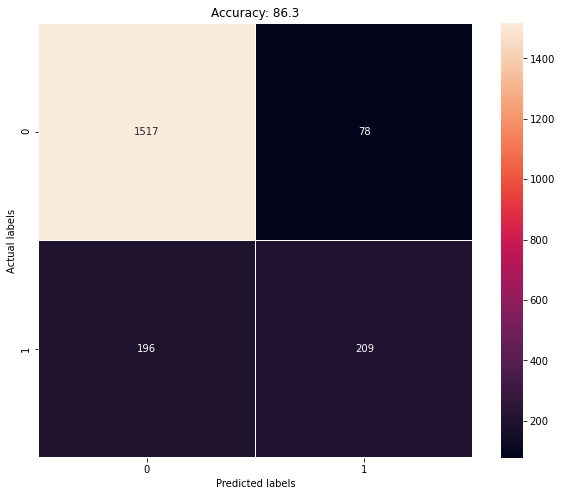

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .5, square = True)
plt.xlabel('Predicted labels')
plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
plt.ylabel('Actual labels')
plt.show()